# STEP 04: Model_Selection



## Import necessary libraries

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

## 4.1 Load datasets from file paths

In [34]:
data_path = '../Dataset/data_cleaned.csv'
genre_data_path = '../Dataset/genre_data_cleaned.csv'

# Check if files exist and load them
if os.path.exists(data_path) and os.path.exists(genre_data_path):
    data = pd.read_csv(data_path)
    genre_data = pd.read_csv(genre_data_path)
    print("Info: Data and genre data successfully loaded.")
else:
    print("Attention: One or both files are not found in the specified directory.")

data.head()

Info: Data and genre data successfully loaded.


,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,...,popularity_category,key_category,duration_ms_category,duration_min,loudness_scaled,release_decade,mode_category,explicit_category,artist_count,artist_category
0,0.0594,1921,0.982,"[""'Sergei Rachmaninoff'"", ""'James Levine'"", ""'...",0.279,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,...,"Very low popularity, niche or little-known","High, popular tonal centers like G or A","Long duration, typical for extended versions o...",14.0,0.624916,1920,"High, often major scale (happier tone)",No,3.0,Small Group
1,0.9630,1921,0.732,"[""'Dennis Day'""]",0.819,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,...,"Very low popularity, niche or little-known","Moderate, standard tonal center","Short duration, typically for radio or pop songs",3.0,0.744797,1920,"High, often major scale (happier tone)",No,1.0,Solo
2,0.0394,1921,0.961,"[""'KHP Kridhamardawa Karaton Ngayogyakarta Had...",0.328,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,...,"Very low popularity, niche or little-known","Low, less common tonal center","Long duration, typical for extended versions o...",8.0,0.707071,1920,"High, often major scale (happier tone)",No,1.0,Solo
3,0.1650,1921,0.967,"[""'Frank Parker'""]",0.275,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,...,"Very low popularity, niche or little-known","Low, less common tonal center","Moderate duration, standard length for most songs",4.0,0.793736,1920,"High, often major scale (happier tone)",No,1.0,Solo
4,0.2530,1921,0.957,"[""'Phil Regan'""]",0.418,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,...,"Very low popularity, niche or little-known","Low, less common tonal center","Very short duration, often intros or interludes",3.0,0.781521,1920,"High, often major scale (happier tone)",No,1.0,Solo


## 4.2 Optimal Cluster Detection Using the Elbow Method

### 4.2.1 Genre_data_cleaned

Preparing data for clustering...
Determining the optimal number of clusters for non-scaled data using the elbow method...


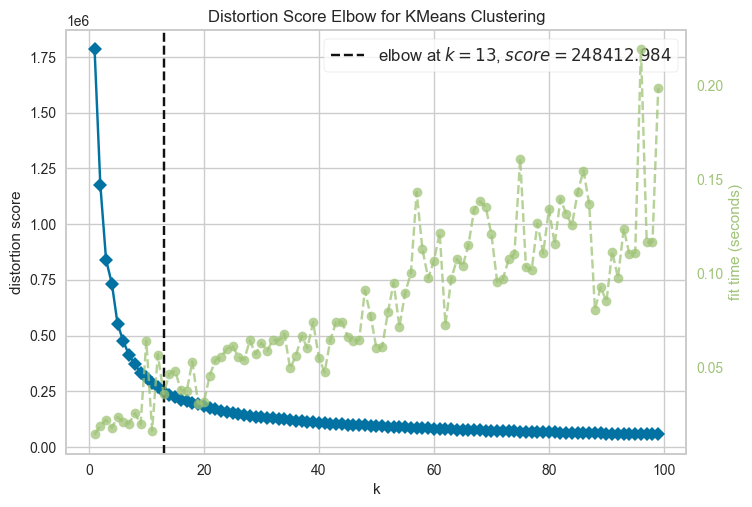

Determining the optimal number of clusters for scaled data using the elbow method...


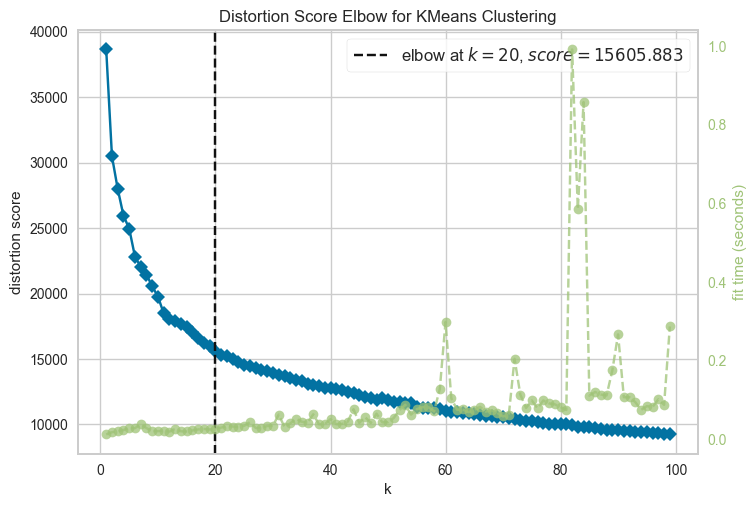

In [10]:
# Select numerical columns for clustering
print("Preparing data for clustering...")
numerical_data = genre_data.select_dtypes(include=[np.number])

# Standardizing data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Function to determine optimal number of clusters using elbow method
def find_optimal_clusters(data, title):
    print(f"Determining the optimal number of clusters for {title} using the elbow method...")
    model = KMeans(random_state=42)
    
    visualizer = KElbowVisualizer(model, k=(1, 100))
    visualizer.fit(data)
    visualizer.show()
    return visualizer.elbow_value_

# Finding optimal clusters for both scaled and non-scaled data
optimal_clusters_non_scaled = find_optimal_clusters(numerical_data, 'non-scaled data')
optimal_clusters_scaled = find_optimal_clusters(numerical_data_scaled, 'scaled data')

##### **Conclusions**
Graphs have been plotted using the elbow method to identify the optimal number of clusters for non-scaled and scaled data respectively.

**Optimal Clusters for Non-Scaled data**
- Elbow Point - Identifies 13 clusters as optimal with a distortion score of 248,412.98.
- Distortion Trend - Sharp decline in distortion from 1 to 13, followed by a gradual flattening.
- Fit Time - Stable and low throughout indicating efficient computation for higher cluster counts.


**Optimal Clusters for Scaled data**
- Elbow Point - Identifies 20 clusters as optimal with a distortion score of 15,605.88.
- Distortion Trend - Steep drop until 20 then a gradual decline with minor fluctuations.
- Fit Time - Fit times (green dots) show slight variability but remain low and manageable overall.

### 4.2.2 Data_cleaned

Preparing data for clustering...
Determining the optimal number of clusters for non-scaled data using the elbow method...


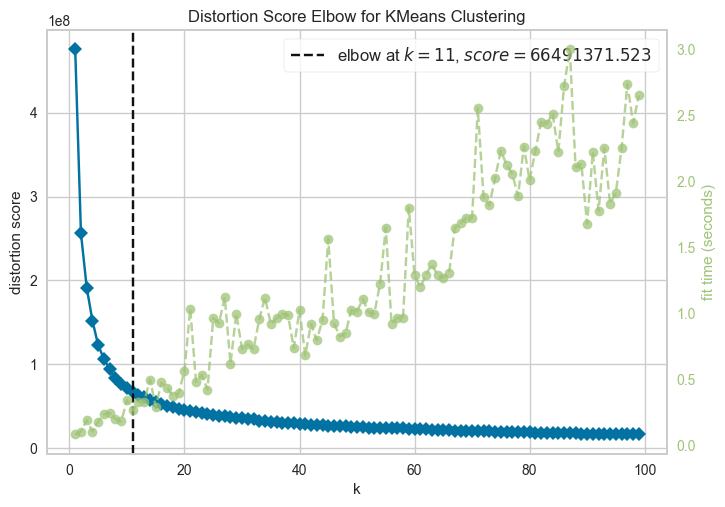

Determining the optimal number of clusters for scaled data using the elbow method...


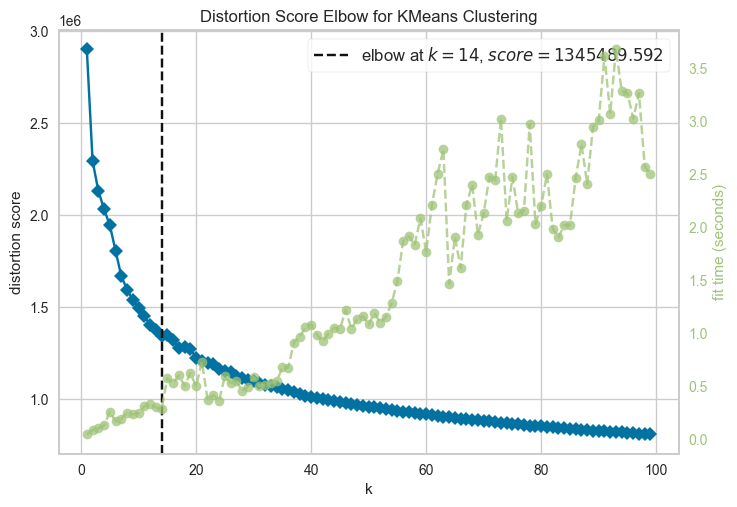

In [11]:
print("Preparing data for clustering...")
numerical_data_1 = data.select_dtypes(include=[np.number])

# Standardizing data
scaler = StandardScaler()
numerical_data_scaled_1 = scaler.fit_transform(numerical_data_1)

# Finding optimal clusters for both scaled and non-scaled data
optimal_clusters_non_scaled = find_optimal_clusters(numerical_data_1, 'non-scaled data')
optimal_clusters_scaled = find_optimal_clusters(numerical_data_scaled_1, 'scaled data')

##### **Conclusions**
Graphs have been plotted using the elbow method to identify the optimal number of clusters for non-scaled and scaled data respectively.

**Optimal Clusters for Non-Scaled data**
- Elbow Point - Identifies 11 clusters as optimal with a distortion score of 66491371.523
- Distortion Trend - The steep drop in distortion before the elbow and flattening after it indicates clustering process captures most of the data structure within 11 clusters
- Fit Time - Fit times are reasonable up to the elbow but become progressively higher beyond.


**Optimal Clusters for Scaled data**
- Elbow Point - Identifies 14 clusters as optimal with a distortion score of 1345489.592
- Distortion Trend - As k increase , score decrease indicating clustering process captures most of the data structure within 14 clusters.
- Fit Time - The green curve shows the computational cost (fit time) increases with k.

In [12]:
# Assuming numerical_data_1 is a Pandas DataFrame, convert it to a 2D NumPy array for compatibility
numerical_data_1_array = numerical_data_1.values  # Convert DataFrame to NumPy array
print(numerical_data_1_array)

[[5.94000000e-02 1.92100000e+03 9.82000000e-01 ... 6.24915825e-01
  1.92000000e+03 3.00000000e+00]
 [9.63000000e-01 1.92100000e+03 7.32000000e-01 ... 7.44796805e-01
  1.92000000e+03 1.00000000e+00]
 [3.94000000e-02 1.92100000e+03 9.61000000e-01 ... 7.07070707e-01
  1.92000000e+03 1.00000000e+00]
 ...
 [6.37000000e-01 2.02000000e+03 1.01000000e-01 ... 9.04768616e-01
  2.02000000e+03 1.00000000e+00]
 [1.95000000e-01 2.02000000e+03 9.98000000e-03 ... 8.27484144e-01
  2.02000000e+03 1.00000000e+00]
 [6.42000000e-01 2.02000000e+03 1.32000000e-01 ... 8.62453997e-01
  2.02000000e+03 2.00000000e+00]]


## 4.3 Types of Clustering 

Clustering is a technique in unsupervised learning where data points are grouped together based on their similarities, aiming to discover inherent patterns or structures within the data.


| **Type**            | **Key Characteristics**                                   | **Example Algorithms**       |
|----------------------|-----------------------------------------------------------|-------------------------------|
| **Partition-Based**  | Divides data into fixed clusters.                         | K-Means, K-Medoids           |
| **Hierarchical**     | Builds a hierarchy of clusters (tree-like structure).     | Agglomerative, Divisive      |
| **Density-Based**    | Groups dense regions, identifies outliers as noise.       | DBSCAN, OPTICS               |
| **Model-Based**      | Fits data to probabilistic models (e.g., Gaussian).       | GMM, Bayesian Clustering     |


## 4.4 Process Clustering 

In [13]:
def process_clustering(data, cluster_models, scale_type):
    print(f"Applying clustering algorithms and evaluating for {scale_type} data...")
    cluster_evaluation = {}
    timing_results = {}

    for name, model_pair in cluster_models.items():
        model = model_pair[0] if scale_type == 'non_scaled' else model_pair[1]
        print(f"Processing {name}...")
        start_time = time.time()
        try:
            if name == 'Gaussian Mixture':
                model.fit(data)
                labels = model.predict(data)
            else:
                labels = model.fit_predict(data)

            # Timing end after fit
            end_time = time.time()
            timing_results[name] = end_time - start_time

            # Evaluate the clustering if appropriate
            if len(set(labels)) > 1 and (len(set(labels)) > 2 or -1 not in labels):  # Ensure valid clusters
                silhouette = silhouette_score(data, labels)
                davies_bouldin = davies_bouldin_score(data, labels)
                calinski_harabasz = calinski_harabasz_score(data, labels)

                cluster_evaluation[name] = {
                    'Silhouette Score': silhouette,
                    'Davies-Bouldin Score': davies_bouldin,
                    'Calinski-Harabasz Score': calinski_harabasz
                }
                print(f"Evaluated {name}: Success")
            else:
                print(f"Evaluated {name}: No valid clusters formed, skipping...")
        except ValueError as ve:
            print(f"Failed to compute for {name} due to a value error: {ve}")
            timing_results[name] = np.nan  # In case of failure, mark as NaN
        except Exception as e:
            print(f"An unexpected error occurred for {name}: {e}")
            timing_results[name] = np.nan
    return cluster_evaluation, timing_results

In [20]:
cluster_evaluation_non_scaled_genre = {}
timing_results_non_scaled_genre = {}
cluster_evaluation_scaled_genre = {}
timing_results_scaled_genre = {}
cluster_evaluation_non_scaled_data = {}
timing_results_non_scaled_data = {}
cluster_evaluation_scaled_data = {}
timing_results_scaled_data = {}

### 4.4.1 Clustering for Kmeans

   **KMeans**: A distance-based algorithm that partitions the data into `k` clusters.

In [21]:
clusters = {
    'KMeans': (KMeans(n_clusters=optimal_clusters_non_scaled, random_state=42),
               KMeans(n_clusters=optimal_clusters_scaled, random_state=42))
}

#### 4.4.1.1 Genre_Data_Cleaned

In [42]:
results_non_scaled, timings_non_scaled = process_clustering(numerical_data, clusters, 'non_scaled')
results_scaled, timings_scaled = process_clustering(numerical_data_scaled, clusters, 'scaled')
cluster_evaluation_non_scaled_genre.update(results_non_scaled)
timing_results_non_scaled_genre.update(timings_non_scaled)
cluster_evaluation_scaled_genre.update(results_scaled)
timing_results_scaled_genre.update(timings_scaled)

Applying clustering algorithms and evaluating for non_scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success
Applying clustering algorithms and evaluating for scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success


In [43]:
print(cluster_evaluation_non_scaled_genre)

{'KMeans': {'Silhouette Score': 0.29524635209988004, 'Davies-Bouldin Score': 0.9307921569128113, 'Calinski-Harabasz Score': 1544.2592536758684}, 'KMedoids': {'Silhouette Score': 0.21608180765671017, 'Davies-Bouldin Score': 1.0412344968014546, 'Calinski-Harabasz Score': 1276.4623962190349}, 'Agglomerative': {'Silhouette Score': 0.23499628480332152, 'Davies-Bouldin Score': 1.0540972332991974, 'Calinski-Harabasz Score': 1328.5829065904418}, 'DBSCAN': {'Silhouette Score': 0.5124835790179066, 'Davies-Bouldin Score': 1.9533393757932638, 'Calinski-Harabasz Score': 39.608921922277624}, 'Gaussian Mixture': {'Silhouette Score': -0.06139288894408426, 'Davies-Bouldin Score': 6.096848449459179, 'Calinski-Harabasz Score': 102.00838114561742}}


#### 4.4.1.2 Data_Cleaned

In [44]:
results_non_scaled1, timings_non_scaled1 = process_clustering(numerical_data_1, clusters, 'non_scaled')
results_scaled1, timings_scaled1 = process_clustering(numerical_data_scaled_1, clusters, 'scaled')
cluster_evaluation_non_scaled_data.update(results_non_scaled1)
timing_results_non_scaled_data.update(timings_non_scaled1)
cluster_evaluation_scaled_data.update(results_scaled1)
timing_results_scaled_data.update(timings_scaled1)

Applying clustering algorithms and evaluating for non_scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success
Applying clustering algorithms and evaluating for scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success


### 4.4.2 Clustering for KMedoids

KMedoids is a clustering algorithm that minimizes the sum of dissimilarities between data points and a set of representative points (medoids), making it robust to noise and outliers.

In [45]:
clusters = {
    'KMedoids': (KMedoids(n_clusters=optimal_clusters_non_scaled, random_state=42),
               KMedoids(n_clusters=optimal_clusters_scaled, random_state=42))
}

#### 4.4.2.1 Genre_Data_Cleaned

In [46]:
results_non_scaled, timings_non_scaled = process_clustering(numerical_data, clusters, 'non_scaled')
results_scaled, timings_scaled = process_clustering(numerical_data_scaled, clusters, 'scaled')
cluster_evaluation_non_scaled_genre.update(results_non_scaled)
timing_results_non_scaled_genre.update(timings_non_scaled)
cluster_evaluation_scaled_genre.update(results_scaled)
timing_results_scaled_genre.update(timings_scaled)

Applying clustering algorithms and evaluating for non_scaled data...
Processing KMedoids...
Evaluated KMedoids: Success
Applying clustering algorithms and evaluating for scaled data...
Processing KMedoids...
Evaluated KMedoids: Success


#### 4.4.2.2 Data_Cleaned

In [47]:
results_non_scaled1, timings_non_scaled1 = process_clustering(numerical_data_1, clusters, 'non_scaled')
results_scaled1, timings_scaled1 = process_clustering(numerical_data_scaled_1, clusters, 'scaled')
cluster_evaluation_non_scaled_data.update(results_non_scaled1)
timing_results_non_scaled_data.update(timings_non_scaled1)
cluster_evaluation_scaled_data.update(results_scaled1)
timing_results_scaled_data.update(timings_scaled1)

Applying clustering algorithms and evaluating for non_scaled data...
Processing KMedoids...
An unexpected error occurred for KMedoids: Unable to allocate 217. GiB for an array with shape (170653, 170653) and data type float64
Applying clustering algorithms and evaluating for scaled data...
Processing KMedoids...
An unexpected error occurred for KMedoids: Unable to allocate 217. GiB for an array with shape (170653, 170653) and data type float64


#### General Guidelines for KMedoids Dataset Sizes

| **Dataset Size**     | **Scalability of KMedoids**                                      | **Recommendation**                                                    |
|----------------------|------------------------------------------------------------------|----------------------------------------------------------------------|
| **< 10,000**          | Easy to handle.                                                 | Suitable for direct application.                                      |
| **10,000–50,000**     | Feasible but may slow down on less optimized implementations.   | Use a subset or dimensionality reduction.                             |
| **50,000–100,000**    | May hit memory constraints, depending on system RAM.            | Use sampling, dimensionality reduction, or sparse methods.           |
| **> 100,000**         | Challenging.                                                    | Consider alternative algorithms or use approximations.                |

### 4.4.3 Clustering for Agglomerative

**Agglomerative Clustering**: A hierarchical approach that merges data points iteratively.

In [48]:
clusters = {
    'Agglomerative': (AgglomerativeClustering(n_clusters=optimal_clusters_non_scaled),
               AgglomerativeClustering(n_clusters=optimal_clusters_scaled))
}

#### 4.4.3.1 Genre_Data_Cleaned

In [49]:
results_non_scaled, timings_non_scaled = process_clustering(numerical_data, clusters, 'non_scaled')
results_scaled, timings_scaled = process_clustering(numerical_data_scaled, clusters, 'scaled')
cluster_evaluation_non_scaled_genre.update(results_non_scaled)
timing_results_non_scaled_genre.update(timings_non_scaled)
cluster_evaluation_scaled_genre.update(results_scaled)
timing_results_scaled_genre.update(timings_scaled)

Applying clustering algorithms and evaluating for non_scaled data...
Processing Agglomerative...
Evaluated Agglomerative: Success
Applying clustering algorithms and evaluating for scaled data...
Processing Agglomerative...
Evaluated Agglomerative: Success


#### 4.4.3.2 Data_Cleaned

In [50]:
results_non_scaled1, timings_non_scaled1 = process_clustering(numerical_data_1, clusters, 'non_scaled')
results_scaled1, timings_scaled1 = process_clustering(numerical_data_scaled_1, clusters, 'scaled')
cluster_evaluation_non_scaled_data.update(results_non_scaled1)
timing_results_non_scaled_data.update(timings_non_scaled1)
cluster_evaluation_scaled_data.update(results_scaled1)
timing_results_scaled_data.update(timings_scaled1)

Applying clustering algorithms and evaluating for non_scaled data...
Processing Agglomerative...
An unexpected error occurred for Agglomerative: Unable to allocate 108. GiB for an array with shape (14561137878,) and data type float64
Applying clustering algorithms and evaluating for scaled data...
Processing Agglomerative...
An unexpected error occurred for Agglomerative: Unable to allocate 108. GiB for an array with shape (14561137878,) and data type float64


### 4.4.4 Clustering for DBSCAN

**DBSCAN**: A density-based clustering method that identifies noise and irregular cluster shapes.

In [51]:
clusters = {
    'DBSCAN': (DBSCAN(eps=10, min_samples=5),                    # Adjusted for non-scaled data
               DBSCAN(eps=0.5, min_samples=5))                  # Adjusted for scaled data
}

#### 4.4.4.1 Genre_Data_Cleaned

In [52]:
results_non_scaled, timings_non_scaled = process_clustering(numerical_data, clusters, 'non_scaled')
results_scaled, timings_scaled = process_clustering(numerical_data_scaled, clusters, 'scaled')
cluster_evaluation_non_scaled_genre.update(results_non_scaled)
timing_results_non_scaled_genre.update(timings_non_scaled)
cluster_evaluation_scaled_genre.update(results_scaled)
timing_results_scaled_genre.update(timings_scaled)

Applying clustering algorithms and evaluating for non_scaled data...
Processing DBSCAN...
Evaluated DBSCAN: Success
Applying clustering algorithms and evaluating for scaled data...
Processing DBSCAN...
Evaluated DBSCAN: Success


#### 4.4.4.2 Data_Cleaned

In [53]:
results_non_scaled1, timings_non_scaled1 = process_clustering(numerical_data_1, clusters, 'non_scaled')
results_scaled1, timings_scaled1 = process_clustering(numerical_data_scaled_1, clusters, 'scaled')
cluster_evaluation_non_scaled_data.update(results_non_scaled1)
timing_results_non_scaled_data.update(timings_non_scaled1)
cluster_evaluation_scaled_data.update(results_scaled1)
timing_results_scaled_data.update(timings_scaled1)

Applying clustering algorithms and evaluating for non_scaled data...
Processing DBSCAN...
Evaluated DBSCAN: Success
Applying clustering algorithms and evaluating for scaled data...
Processing DBSCAN...
Evaluated DBSCAN: Success


### 4.4.5 Clustering for Gaussian Mixture

**Gaussian Mixture Models**: A probabilistic approach that assumes data is generated from a mixture of Gaussian distributions.

In [54]:
clusters = {
    'Gaussian Mixture': (GaussianMixture(n_components=optimal_clusters_non_scaled, random_state=42),
                         GaussianMixture(n_components=optimal_clusters_scaled, random_state=42)),
}

#### 4.4.5.1 Genre_Data_Cleaned

In [55]:
results_non_scaled, timings_non_scaled = process_clustering(numerical_data, clusters, 'non_scaled')
results_scaled, timings_scaled = process_clustering(numerical_data_scaled, clusters, 'scaled')
cluster_evaluation_non_scaled_genre.update(results_non_scaled)
timing_results_non_scaled_genre.update(timings_non_scaled)
cluster_evaluation_scaled_genre.update(results_scaled)
timing_results_scaled_genre.update(timings_scaled)

Applying clustering algorithms and evaluating for non_scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success
Applying clustering algorithms and evaluating for scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success


#### 4.4.5.2 Data_Cleaned

In [56]:
results_non_scaled1, timings_non_scaled1 = process_clustering(numerical_data_1, clusters, 'non_scaled')
results_scaled1, timings_scaled1 = process_clustering(numerical_data_scaled_1, clusters, 'scaled')
cluster_evaluation_non_scaled_data.update(results_non_scaled1)
timing_results_non_scaled_data.update(timings_non_scaled1)
cluster_evaluation_scaled_data.update(results_scaled1)
timing_results_scaled_data.update(timings_scaled1)

Applying clustering algorithms and evaluating for non_scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success
Applying clustering algorithms and evaluating for scaled data...
Processing Gaussian Mixture...
Evaluated Gaussian Mixture: Success


## 4.5 Display Results & Visualize Results



In [57]:
def display_results(results, timings, scale_type):
    print(f"\nFinal Evaluation Metrics for {scale_type} data:")
    results_df = pd.DataFrame(results).T
    timings_df = pd.DataFrame(list(timings.items()), columns=['Algorithm', 'Time (s)'])

    # Rank each algorithm by metric
    results_df['Silhouette Rank'] = results_df['Silhouette Score'].rank(ascending=False)
    results_df['Davies-Bouldin Rank'] = results_df['Davies-Bouldin Score'].rank(ascending=True)
    results_df['Calinski-Harabasz Rank'] = results_df['Calinski-Harabasz Score'].rank(ascending=False)

    # Calculate the average rank for each algorithm
    results_df['Average Rank'] = results_df[['Silhouette Rank', 'Davies-Bouldin Rank', 'Calinski-Harabasz Rank']].mean(axis=1)
    best_algorithm = results_df['Average Rank'].idxmin()

    print("\nEvaluation Metrics:")
    display(results_df)
    print("\nAlgorithm Timing Results:")
    display(timings_df)
    print(f"\nThe best performing algorithm based on average ranking across metrics for {scale_type} data is: {best_algorithm}")

    # Plotting the results
    print("Visualizing the results...")
    fig, ax = plt.subplots(4, 1, figsize=(10, 20))
    metrics = ['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score']
    colors = ['skyblue', 'lightgreen', 'salmon']

    for i, metric in enumerate(metrics):
        ax[i].bar(results_df.index, results_df[metric], color=colors[i])
        ax[i].set_title(f"{metric} - {scale_type} data")
        ax[i].set_ylabel('Score')
        ax[i].set_xticks(np.arange(len(results_df.index)))
        ax[i].set_xticklabels(results_df.index, rotation=45, ha='right')

    # Plot timing results
    ax[3].bar(timings_df['Algorithm'], timings_df['Time (s)'], color='lightblue')
    ax[3].set_title(f'Time Efficiency of Clustering Algorithms - {scale_type} data')
    ax[3].set_ylabel('Time (s)')
    ax[3].set_xticks(np.arange(len(timings_df['Algorithm'])))
    ax[3].set_xticklabels(timings_df['Algorithm'], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


The function is designed to evaluate clustering algorithms and provide a comprehensive comparison of their quality (via metrics) and efficiency (via timing).
It is particularly useful in **model selection** and performance analysis for clustering tasks.

**Evaluation Metrics**
   - The output in unsupervised learning is probabilistic, and hence, evaluating the performance of the model becomes important.Various metrics are used to evaluate the performance of a model.
   - **Silhouette Score**: Measures how similar data points are within a cluster vs. other clusters (higher is better).
   - **Davies-Bouldin Score**: Evaluates the compactness and separation of clusters (lower is better).
   - **Calinski-Harabasz Score**: Measures the ratio of between-cluster to within-cluster dispersion (higher is better).
   -  Calculates an **Average Rank** across the metrics to determine the overall best-performing algorithm

**Visualization**
- Generates **four bar plots**:
  1. Silhouette Score for all algorithms.
  2. Davies-Bouldin Score for all algorithms.
  3. Calinski-Harabasz Score for all algorithms.
  4. Runtime comparison (time taken by each algorithm).


### 4.5.1 Genre_Data_Cleaned


Final Evaluation Metrics for non_scaled data:

Evaluation Metrics:


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score,Silhouette Rank,Davies-Bouldin Rank,Calinski-Harabasz Rank,Average Rank
KMeans,0.295246,0.930792,1544.259254,2.0,1.0,1.0,1.333333
KMedoids,0.216082,1.041234,1276.462396,4.0,2.0,3.0,3.000000
Agglomerative,0.234996,1.054097,1328.582907,3.0,3.0,2.0,2.666667
DBSCAN,0.512484,1.953339,39.608922,1.0,4.0,5.0,3.333333
Gaussian Mixture,-0.061393,6.096848,102.008381,5.0,5.0,4.0,4.666667



Algorithm Timing Results:


,Algorithm,Time (s)
0,KMeans,0.015949
1,KMedoids,0.535179
2,Agglomerative,0.533464
3,DBSCAN,0.392665
4,Gaussian Mixture,1.540781



The best performing algorithm based on average ranking across metrics for non_scaled data is: KMeans
Visualizing the results...


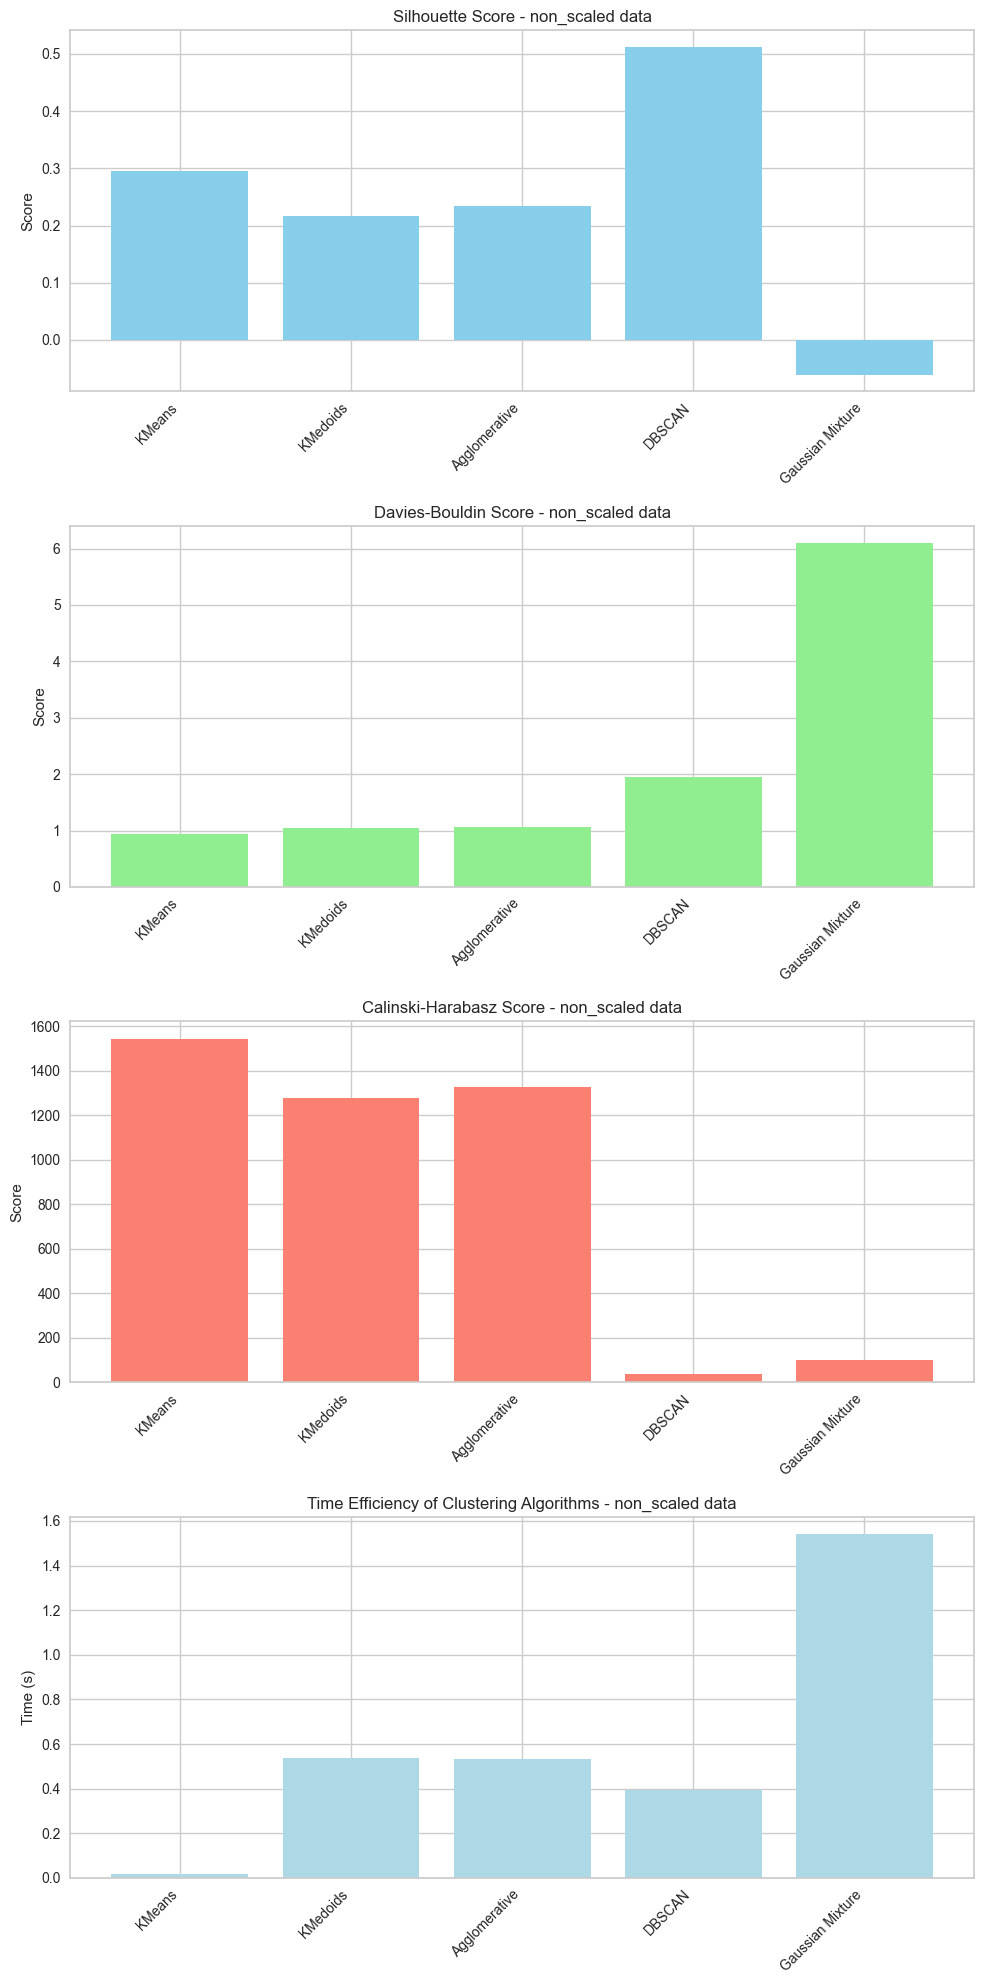


Final Evaluation Metrics for scaled data:

Evaluation Metrics:


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score,Silhouette Rank,Davies-Bouldin Rank,Calinski-Harabasz Rank,Average Rank
KMeans,0.117807,1.685488,269.407353,1.0,1.0,1.0,1.000000
KMedoids,0.048155,2.354389,184.329460,3.0,4.0,3.0,3.333333
Agglomerative,0.072155,1.921046,231.038397,2.0,2.0,2.0,2.000000
DBSCAN,-0.378254,2.210401,2.259028,5.0,3.0,5.0,4.333333
Gaussian Mixture,0.004371,2.980108,158.958933,4.0,5.0,4.0,4.333333



Algorithm Timing Results:


,Algorithm,Time (s)
0,KMeans,0.012986
1,KMedoids,0.398078
2,Agglomerative,0.518575
3,DBSCAN,0.314666
4,Gaussian Mixture,6.551909



The best performing algorithm based on average ranking across metrics for scaled data is: KMeans
Visualizing the results...


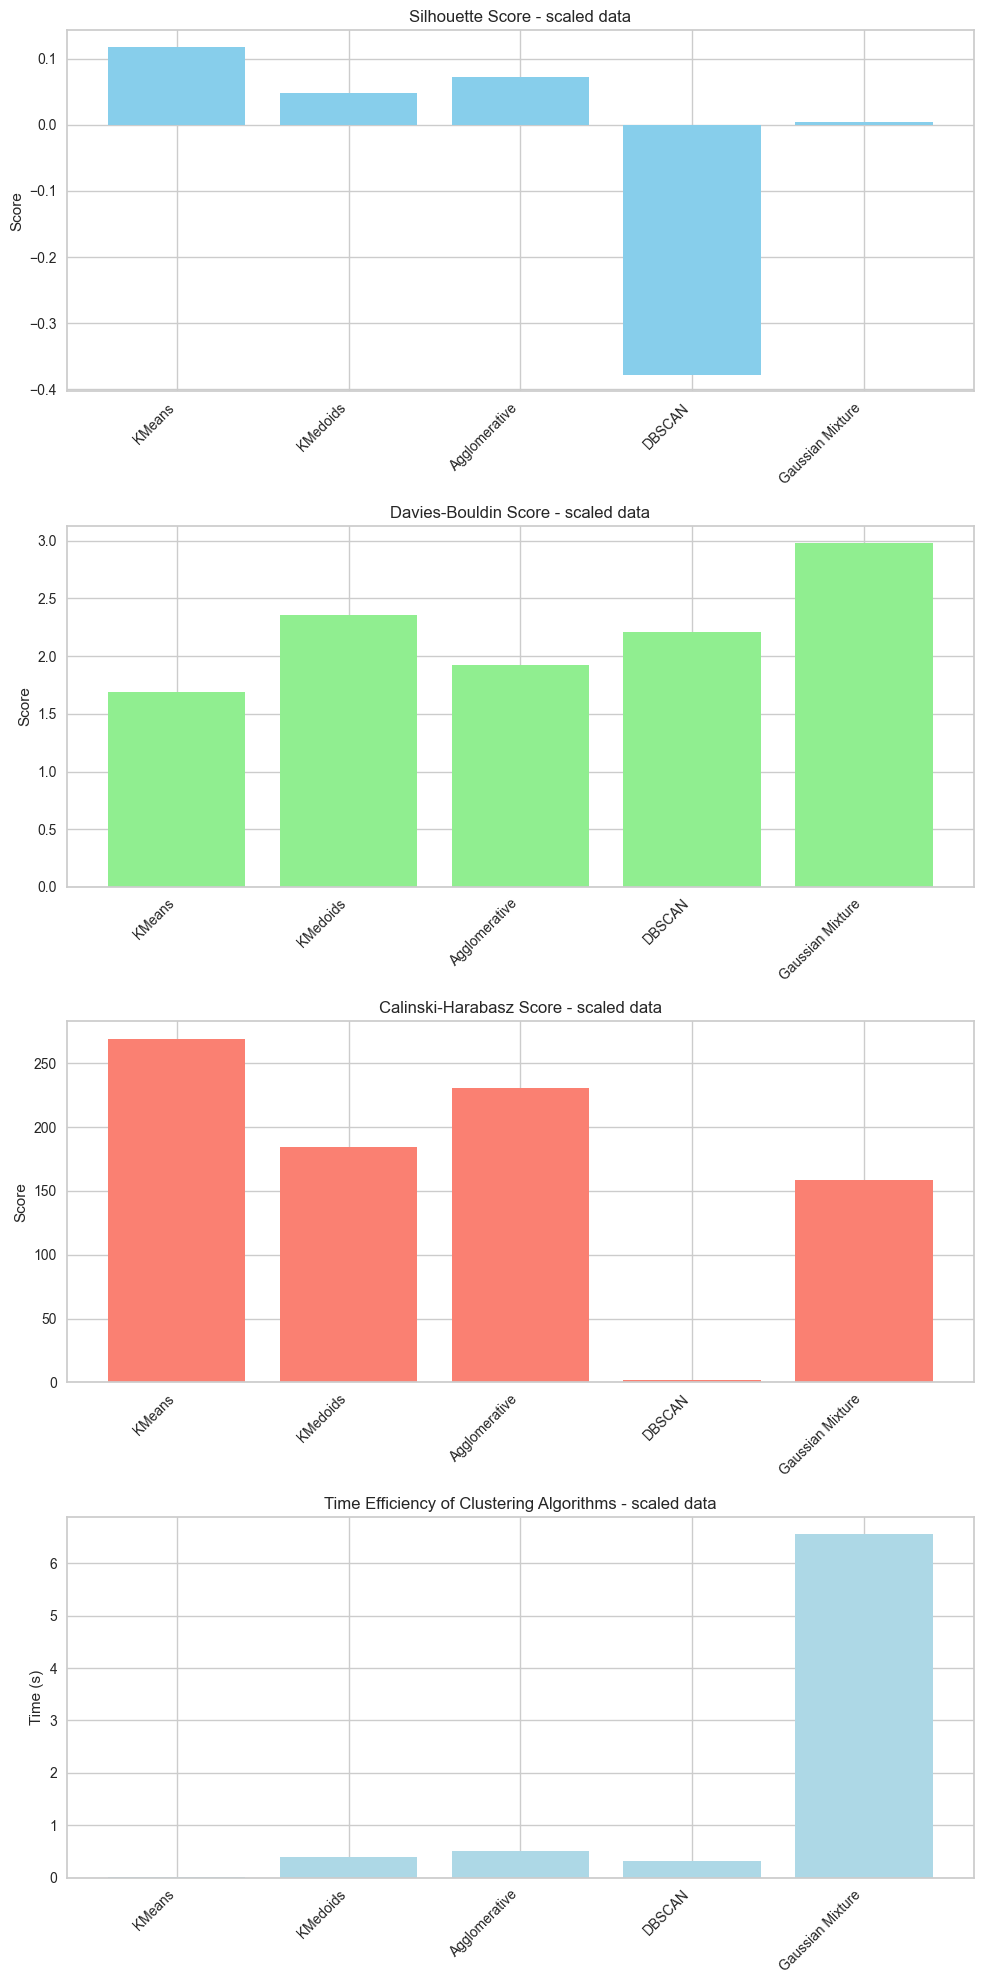

In [58]:
display_results(cluster_evaluation_non_scaled_genre, timing_results_non_scaled_genre, 'non_scaled')
display_results(cluster_evaluation_scaled_genre, timing_results_scaled_genre, 'scaled')

### 4.5.2 Data_Cleaned


Final Evaluation Metrics for non_scaled data:

Evaluation Metrics:


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score,Silhouette Rank,Davies-Bouldin Rank,Calinski-Harabasz Rank,Average Rank
KMeans,0.287469,0.997832,104914.683143,1.0,1.0,1.0,1.0
Gaussian Mixture,-0.167212,9.650177,3908.810573,3.0,3.0,3.0,3.0
DBSCAN,0.026315,2.636768,10706.871880,2.0,2.0,2.0,2.0



Algorithm Timing Results:


,Algorithm,Time (s)
0,KMeans,0.292819
1,KMedoids,NaN
2,Gaussian Mixture,123.173397
3,Agglomerative,NaN
4,DBSCAN,92.453984



The best performing algorithm based on average ranking across metrics for non_scaled data is: KMeans
Visualizing the results...


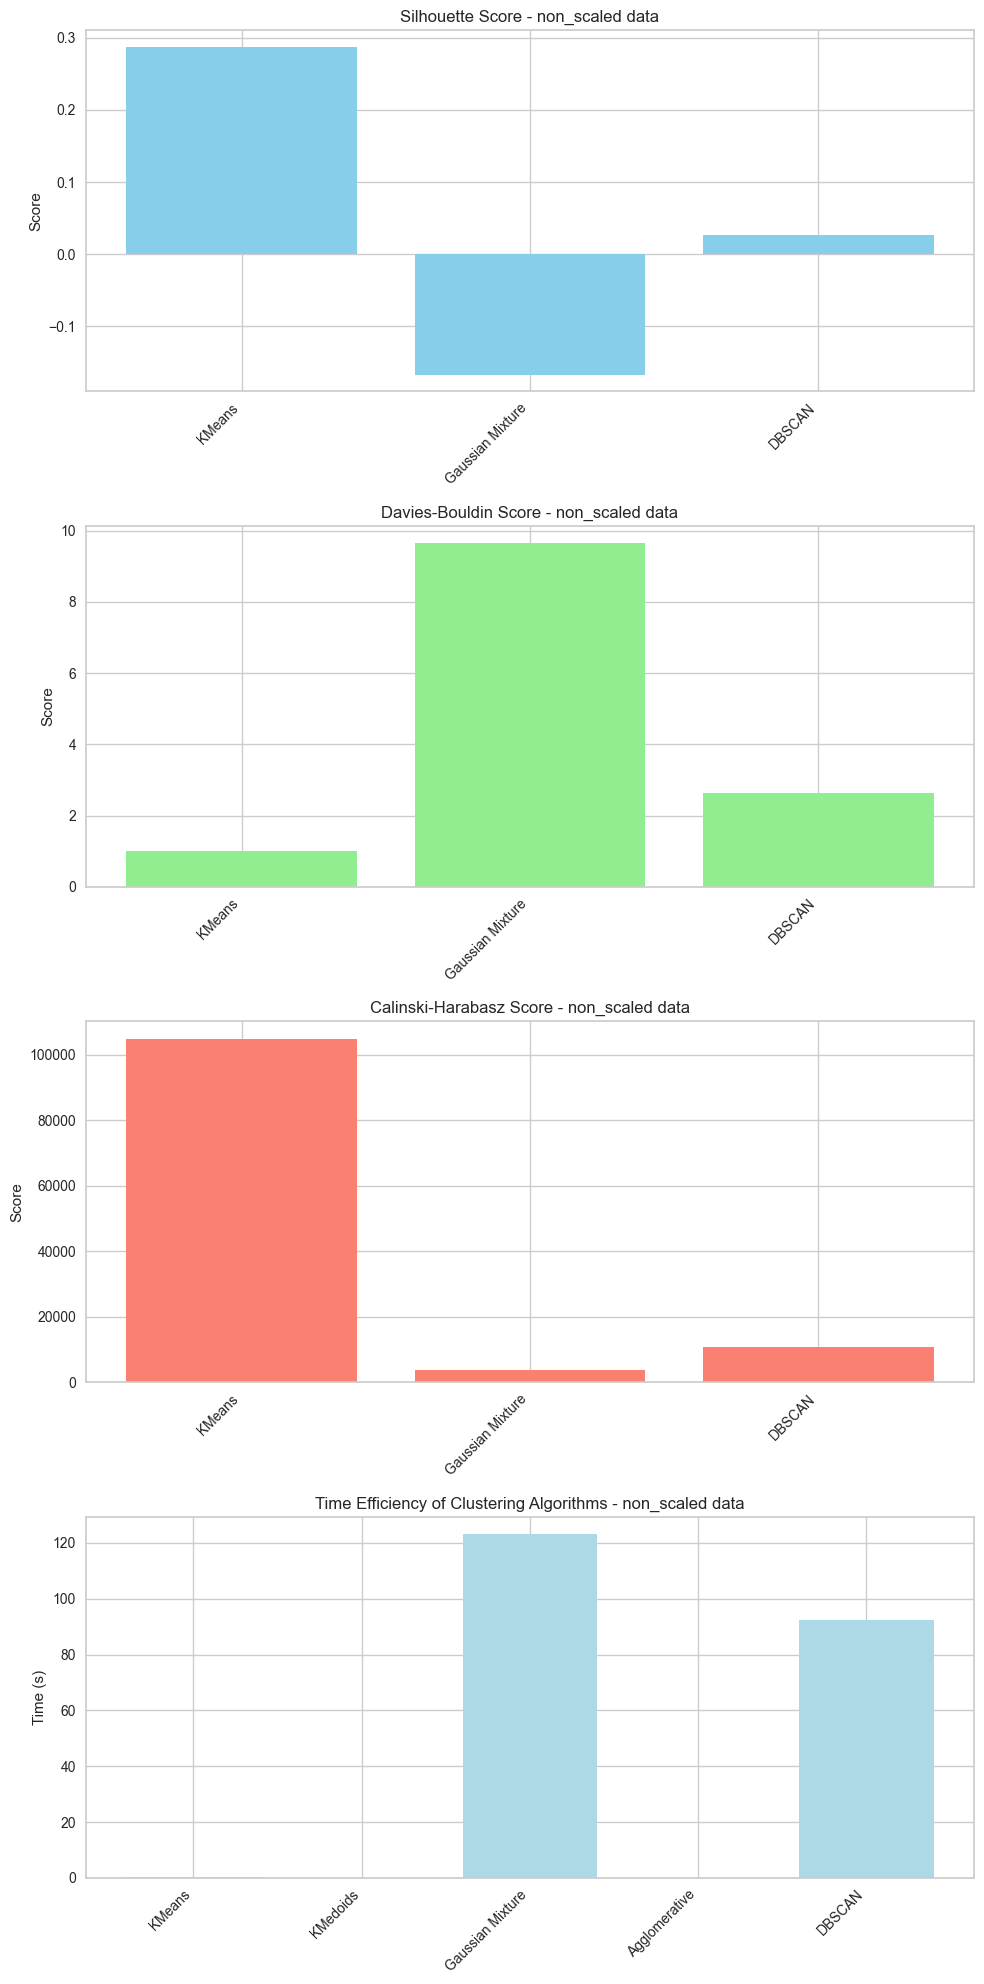


Final Evaluation Metrics for scaled data:

Evaluation Metrics:


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score,Silhouette Rank,Davies-Bouldin Rank,Calinski-Harabasz Rank,Average Rank
KMeans,0.113327,1.785466,15175.944218,1.0,2.0,1.0,1.333333
Gaussian Mixture,0.026453,3.401770,6011.312654,2.0,3.0,2.0,2.333333
DBSCAN,-0.269124,0.834639,23.228042,3.0,1.0,3.0,2.333333



Algorithm Timing Results:


,Algorithm,Time (s)
0,KMeans,0.303931
1,KMedoids,NaN
2,Gaussian Mixture,76.883069
3,Agglomerative,NaN
4,DBSCAN,53.002213



The best performing algorithm based on average ranking across metrics for scaled data is: KMeans
Visualizing the results...


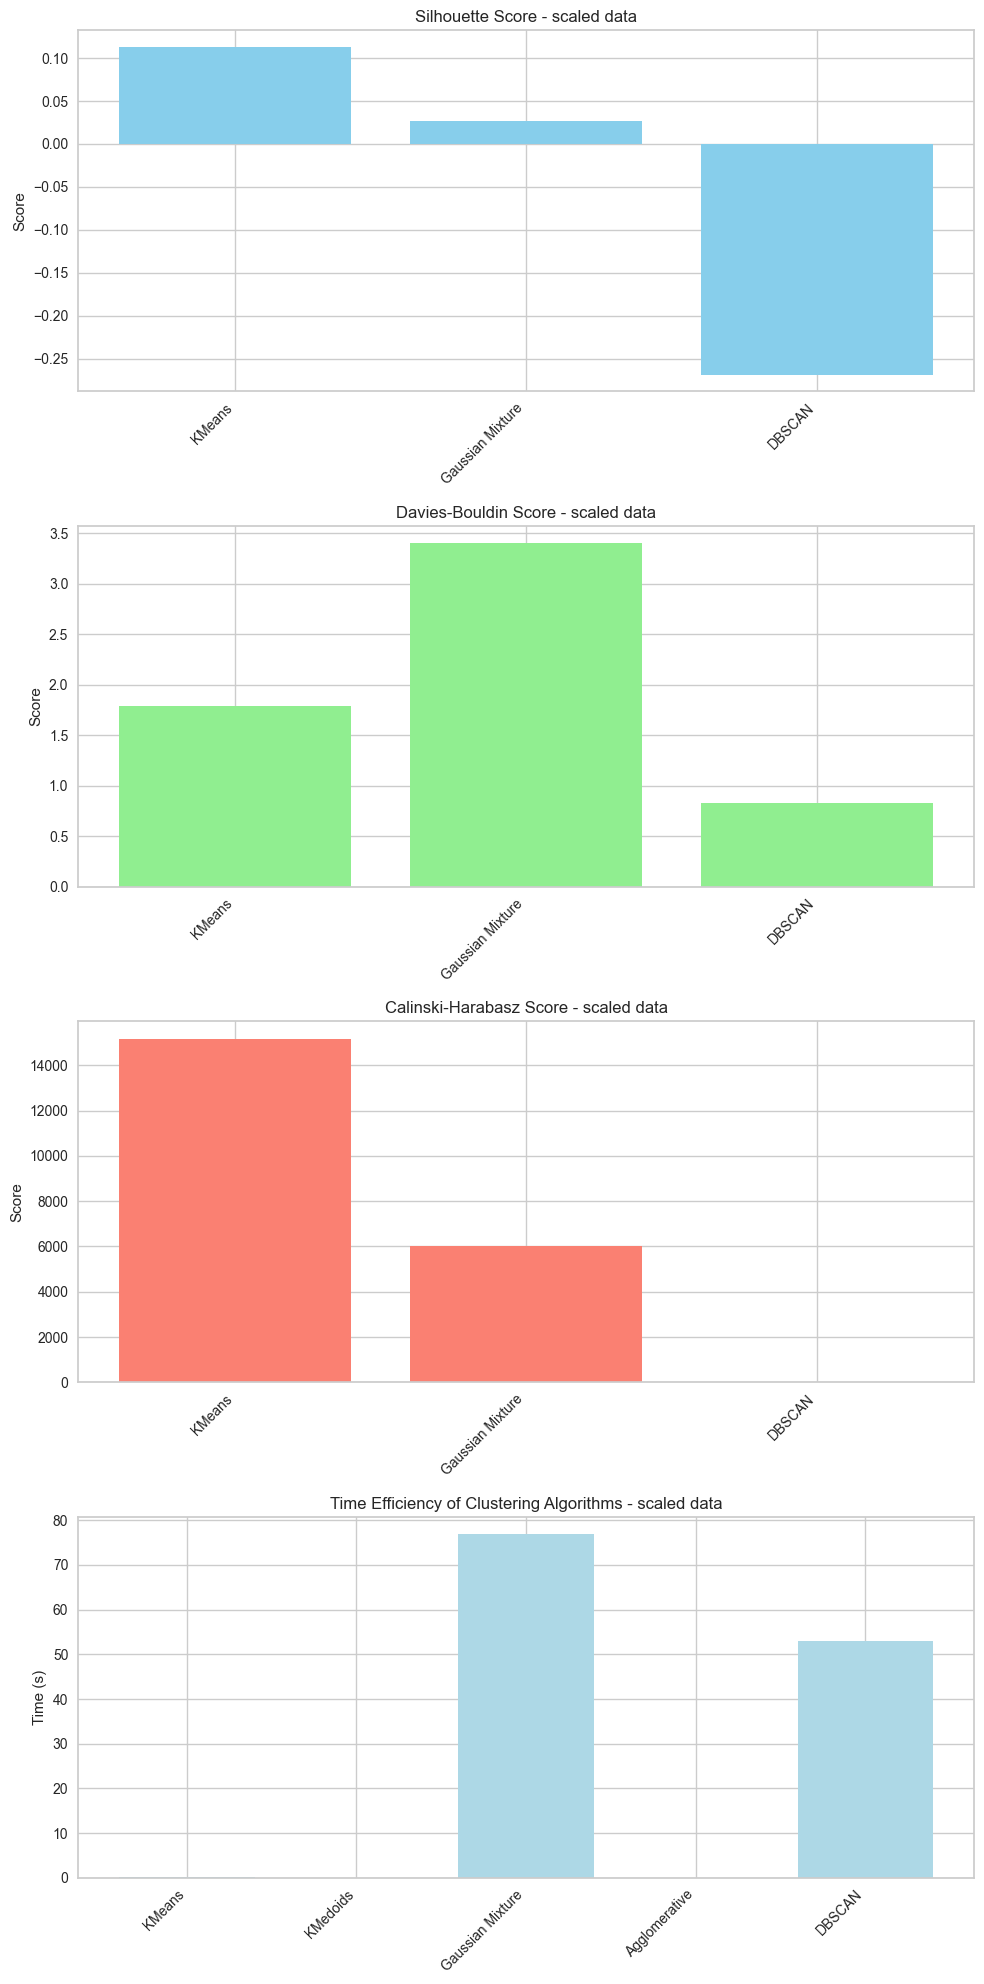

In [59]:
display_results(cluster_evaluation_non_scaled_data, timing_results_non_scaled_data, 'non_scaled')
display_results(cluster_evaluation_scaled_data, timing_results_scaled_data, 'scaled')

## 4.6 Conclusion

- DBSCAN works well for highly separable clusters but struggles with compactness and small datasets.

- KMedoids consistently shows moderate clustering performance but is slower compared to KMeans.

**Best Overall Algorithm**
- KMeans consistently outperforms others by achieving the best clustering quality and efficiency.

**Runner-Up Algorithms** (Alternative choice)
- Agglomerative Clustering (strong performance, moderate timing).

**Not Recommended**
- Gaussian Mixture due to poor metrics and high computational cost.

##### **Final Model Selection** ~ **KMeans**